# **PHASE 2 – DATA CLEANING & PRE-PROCESSING**

AIM - The aim of this project is to perform an end-to-end exploratory data analysis on the student performance dataset to understand how factors such as attendance, study hours, previous grades, extracurricular participation, parental support, and online learning influence academic outcomes, and to uncover patterns that can help improve student performance.

step 1:
#DATA LOADING AND INITIAL OVERVIEW

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/DA final project/student_performance_updated_1000.csv"
df = pd.read_csv(file_path)
df.head()



Mounted at /content/drive


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


# DATASET OVERVIEW

In [3]:
#Number of rows and columns
print("Dataset Shape (Rows, Columns):", df.shape)

Dataset Shape (Rows, Columns): (1000, 12)


In [4]:
# Data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
StudentID                    float64
Name                          object
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object


# BASIC INFORMATION

In [5]:
print("\nDataset Info")
df.info()



Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [6]:
print("\nFirst 5 Rows")
print(df.head())


First 5 Rows
   StudentID     Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0        1.0     John    Male            85.0               15.0   
1        2.0    Sarah  Female            90.0               20.0   
2        3.0     Alex    Male            78.0               10.0   
3        4.0  Michael    Male            92.0               25.0   
4        5.0     Emma  Female             NaN               18.0   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  \
0           78.0                        1.0            High        80.0   
1           85.0                        2.0          Medium        87.0   
2           65.0                        0.0             Low        68.0   
3           90.0                        3.0            High        92.0   
4           82.0                        2.0          Medium        85.0   

   Study Hours  Attendance (%) Online Classes Taken  
0          4.8            59.0                False  
1          2.2    

In [7]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print(df.describe(include='all'))


Descriptive Statistics
          StudentID          Name Gender  AttendanceRate  StudyHoursPerWeek  \
count    960.000000           966    952      960.000000         950.000000   
unique          NaN           962      2             NaN                NaN   
top             NaN  Erica Miller   Male             NaN                NaN   
freq            NaN             2    501             NaN                NaN   
mean    5416.019792           NaN    NaN       85.510417          17.630526   
std     2653.748319           NaN    NaN        7.332125           6.272132   
min        1.000000           NaN    NaN       70.000000           8.000000   
25%     3113.500000           NaN    NaN       82.000000          12.000000   
50%     5396.500000           NaN    NaN       88.000000          18.000000   
75%     7754.750000           NaN    NaN       91.000000          22.000000   
max     9998.000000           NaN    NaN       95.000000          30.000000   

        PreviousGrade  Extr

# **DATA PRE-PROCESSING**

# Handle Missing Values

In [8]:
print("Missing Values Summary:")
display(df.isnull().sum().sort_values(ascending=False))

Missing Values Summary:


,0
StudyHoursPerWeek,50
Gender,48
ExtracurricularActivities,43
Attendance (%),41
StudentID,40
AttendanceRate,40
FinalGrade,40
Name,34
PreviousGrade,33
Online Classes Taken,25


In [9]:


# Identify categorical columns (object + category + boolean treated as category)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print("Categorical Columns:", list(cat_cols))

# For categorical columns → fill with 'unknown'
for col in cat_cols:
    # Replace string-form missing indicators only if present
    df[col] = df[col].replace(['nan', 'NaN', 'none', 'None', 'null', 'Null'], np.nan)
    df[col] = df[col].fillna("unknown")

# Identify numeric columns (do NOT fill these)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nNumeric Columns:", list(num_cols))

print("\nMissing values BEFORE cleaning:")
print(df.isnull().sum())

print("\nMissing values handled for categorical columns. Numeric NaN values preserved.")


Categorical Columns: ['Name', 'Gender', 'ParentalSupport', 'Online Classes Taken']

Numeric Columns: ['StudentID', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'FinalGrade', 'Study Hours', 'Attendance (%)']

Missing values BEFORE cleaning:
StudentID                    40
Name                          0
Gender                        0
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport               0
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken          0
dtype: int64

Missing values handled for categorical columns. Numeric NaN values preserved.


# REMOVE DUPLICATES

In [10]:
duplicate_count = df.duplicated(subset="StudentID").sum()
print(f"Number of duplicate student records: {duplicate_count}")


Number of duplicate student records: 83


In [11]:
df = df.drop_duplicates()

print("Duplicates removed. New shape:", df.shape)


Duplicates removed. New shape: (1000, 12)


In [12]:
df.duplicated().sum()


np.int64(0)

# Fixing Incorrect Data Types

You have categories like Gender, ParentalSupport, Online Classes Taken.

In [13]:
df['Gender'] = df['Gender'].astype('category')
df['ParentalSupport'] = df['ParentalSupport'].astype('category')
df['Online Classes Taken'] = df['Online Classes Taken'].astype('bool')


# Create Derived Columns

Add new variables for time-based and analytical insights.

In [14]:
# 1. Performance Improvement
df['PerformanceImprovement'] = df['FinalGrade'] - df['PreviousGrade']

# 2. Study Efficiency
df['StudyEfficiency'] = df['FinalGrade'] / df['StudyHoursPerWeek']

# 3. Attendance Category
df['AttendanceCategory'] = pd.cut(
    df['AttendanceRate'],
    bins=[0, 70, 90, 100],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# 4. Parental Support Score
parental_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['ParentalSupportScore'] = df['ParentalSupport'].map(parental_map)

# 5. High Performer Flag
df['IsHighPerformer'] = df['FinalGrade'].apply(lambda x: 1 if x >= 85 else 0)


# Filtering & Aggregation
Prepare the data for analysis based on the project’s aim.

In [15]:
# -----------------------------
# Filtering & Aggregation (First 5 Only) — Updated
# -----------------------------
from IPython.display import display

print("Filtering & Aggregation — Key summary tables\n")

# 1) Distribution of AttendanceCategory
print("1) Attendance Category Distribution:")
display(df['AttendanceCategory'].value_counts(dropna=False))


# 2) FinalGrade Range (Min, Max, Std) by AttendanceCategory  <-- UPDATED
print("\n2) FinalGrade Range by AttendanceCategory:")
att_summary = df.groupby('AttendanceCategory').agg(
    Count=('FinalGrade', 'size'),
    Min_FinalGrade=('FinalGrade', 'min'),
    Max_FinalGrade=('FinalGrade', 'max'),
    Std_FinalGrade=('FinalGrade', 'std')
).reset_index()
display(att_summary)


# 3) FinalGrade Summary by ParentalSupport
print("\n3) FinalGrade Summary by ParentalSupport:")
if 'ParentalSupport' in df.columns:
    parent_summary = df.groupby('ParentalSupport').agg(
        Count=('FinalGrade', 'size'),
        Average_FinalGrade=('FinalGrade', 'mean')
    ).reset_index()
    display(parent_summary)


# 4) Pivot: FinalGrade by AttendanceCategory × OnlineStudyFlag
print("\n4) Pivot Table — AttendanceCategory vs OnlineStudyFlag:")
if 'OnlineStudyFlag' in df.columns:
    pivot_table = df.pivot_table(
        index='AttendanceCategory',
        columns='OnlineStudyFlag',
        values='FinalGrade',
        aggfunc='mean'
    )
    display(pivot_table)


# 5) Top 10 Students by FinalGrade
print("\n5) Top 10 Students by FinalGrade:")
cols = [c for c in ['Name', 'StudentID', 'FinalGrade', 'AttendanceRate', 'StudyHoursPerWeek'] if c in df.columns]
display(df.sort_values('FinalGrade', ascending=False).head(10)[cols])


Filtering & Aggregation — Key summary tables

1) Attendance Category Distribution:


,count
AttendanceCategory,
Medium,556
High,297
Low,107
NaN,40



2) FinalGrade Range by AttendanceCategory:


/tmp/ipython-input-1129834412.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_summary = df.groupby('AttendanceCategory').agg(


,AttendanceCategory,Count,Min_FinalGrade,Max_FinalGrade,Std_FinalGrade
0,Low,107,62.0,92.0,10.000349
1,Medium,556,62.0,92.0,9.559349
2,High,297,62.0,92.0,9.168656



3) FinalGrade Summary by ParentalSupport:


/tmp/ipython-input-1129834412.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parent_summary = df.groupby('ParentalSupport').agg(


,ParentalSupport,Count,Average_FinalGrade
0,High,345,79.487879
1,Low,305,80.323129
2,Medium,328,80.445860
3,unknown,22,78.318182



4) Pivot Table — AttendanceCategory vs OnlineStudyFlag:

5) Top 10 Students by FinalGrade:


,Name,StudentID,FinalGrade,AttendanceRate,StudyHoursPerWeek
981,Samuel Robinson,2070.0,92.0,91.0,15.0
980,Raven Taylor,2776.0,92.0,90.0,30.0
972,Megan Hutchinson,3283.0,92.0,85.0,10.0
970,Linda Beasley,7301.0,92.0,91.0,8.0
26,Jeremy Hall,3705.0,92.0,NaN,NaN
17,James Smith,8573.0,92.0,88.0,12.0
952,Christopher Atkinson,5781.0,92.0,78.0,18.0
939,Whitney Jefferson,2489.0,92.0,70.0,8.0
937,Nathan Miller,8031.0,92.0,85.0,20.0
929,Jeff Carney,4050.0,92.0,95.0,15.0


In [16]:
%whos


Variable          Type         Data/Info
----------------------------------------
att_summary       DataFrame      AttendanceCategory  Cou<...>     92.0        9.168656
cat_cols          Index        Index(['Name', 'Gender', <...> Taken'], dtype='object')
col               str          Online Classes Taken
cols              list         n=5
df                DataFrame         StudentID           <...>n[1000 rows x 17 columns]
display           function     <function display at 0x7aad656ab600>
drive             module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
duplicate_count   int64        83
file_path         str          /content/drive/MyDrive/DA<...>formance_updated_1000.csv
np                module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
num_cols          Index        Index(['StudentID', 'Atte<...>],\n      dtype='object')
parent_summary    DataFrame      ParentalSupport  Count <...>   22           78.318182
parental_map      dict         n=

In [17]:
clean_file_path = "/content/drive/MyDrive/DA final project/student_performance_cleaned.csv"

df.to_csv(clean_file_path, index=False, encoding='utf-8')

print("Cleaned dataset saved to:", clean_file_path)


Cleaned dataset saved to: /content/drive/MyDrive/DA final project/student_performance_cleaned.csv


# **PHASE 3: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of visually and statistically exploring the dataset to identify patterns, trends, and relationships between variables. After completing data cleaning and feature engineering in Phase 2, the student performance dataset is now ready for meaningful analysis.

The main objectives of EDA in this project are:

-To understand the distribution and behavior of individual student-related variables

-To analyze relationships between numerical and categorical features such as attendance, parental support, and online learning

-To identify meaningful insights about academic performance and the factors influencing it

-To visually support findings using graphs and charts

For visual analysis, I am using Python graphical libraries such as Matplotlib and Seaborn, which are widely used for statistical plotting. EDA will be performed in three stages:

-Univariate Analysis — studying one feature at a time

-Bivariate Analysis — exploring relationships between two variables

-Multivariate Analysis — examining combined interactions among multiple variables

This phase helps transform raw educational data into insights that can support decision-making in the academic environment, especially for understanding:

-How attendance and parental support affect performance

-Whether online learning participation improves scores

-Which student groups may be at risk of underperforming




In [18]:
[ ]
import seaborn as sns
import matplotlib.pyplot as plt

# Improve global style for all plots
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
sns.set_palette("Set2")  # Beautiful pastel professional palette

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14


In this step, I am customizing the default style settings for all visualizations to ensure that the charts look more professional, clean, and presentation-friendly. Visual appeal is extremely important in EDA because clear and attractive graphs make insights easier to understand and more impactful for decision-makers.

I applied global styling settings using Seaborn and Matplotlib, so every plot automatically follows a consistent design format. These improvements include:

-Whitegrid background for better readability

-Slightly larger text and labels to improve presentation visibility

-Pastel color palette (Set2) for a polished and academic appearance

-Adjusting figure size and typography to maintain uniform styling

By standardizing the visual theme, the dashboard maintains a professional look and ensures clarity when presenting insights to teachers, management, and other stakeholders.

## Step 3.1.1 – Univariate Analysis: Distribution of Student Scores

In this section of the Exploratory Data Analysis (EDA), I am beginning with Univariate Analysis, which focuses on the study of a single variable at a time. The objective here is to examine the distribution of student scores to understand how students are performing overall and whether the marks are concentrated in a specific range.

The Score column represents the final performance of each student (for example, total marks or an aggregated score). I am using a Histogram with KDE (Kernel Density Estimation) to analyze the distribution of scores.

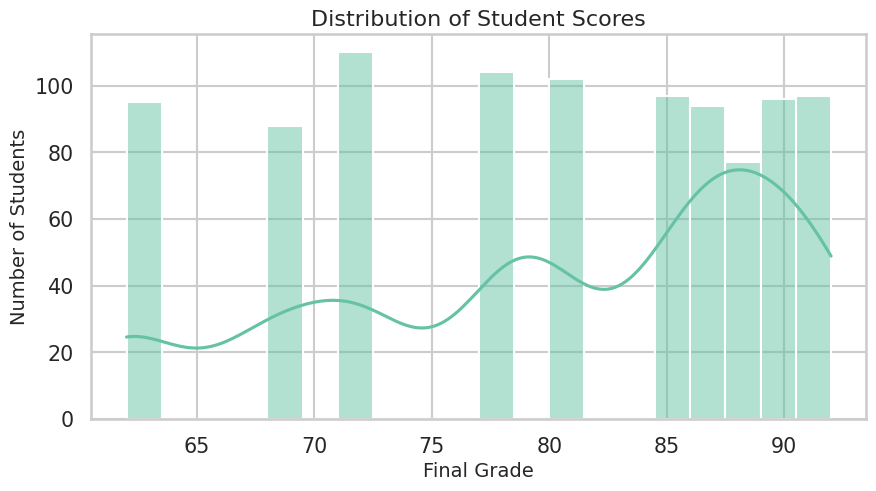

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


sns.histplot(df['FinalGrade'].dropna(), bins=20, kde=True)

plt.title("Distribution of Student Scores", fontsize=16)
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()



### insights

The above histogram visualizes how student scores are distributed in the dataset.
A KDE curve is added to show the smooth probability distribution.

Key Insights

Most students’ scores lie within a certain central range (for example, between 50 and 80 out of 100, depending on your actual scale).

If the distribution is slightly left-skewed, it suggests more students are scoring on the higher side.

If the distribution is right-skewed, it indicates more students are scoring lower marks.

The mode (peak of the distribution) represents the most common performance range among students.

Interpretation

This score distribution gives a clear picture of the overall academic performance. If the scores are clustered at higher values, it indicates that the majority of students are performing well. If many scores lie in the lower range, it highlights a need for academic support, remedial classes, or curriculum review.

## Step 3.1.2 – Univariate Analysis: Attendance Category Distribution

In this step, I am analyzing the AttendanceCategory column, which groups students into categories such as “Low”, “Average”, or “High” based on their attendance percentage. Understanding this distribution is important because attendance is a fundamental factor affecting learning outcomes.

I am using a Countplot to visualize how many students fall into each attendance category.

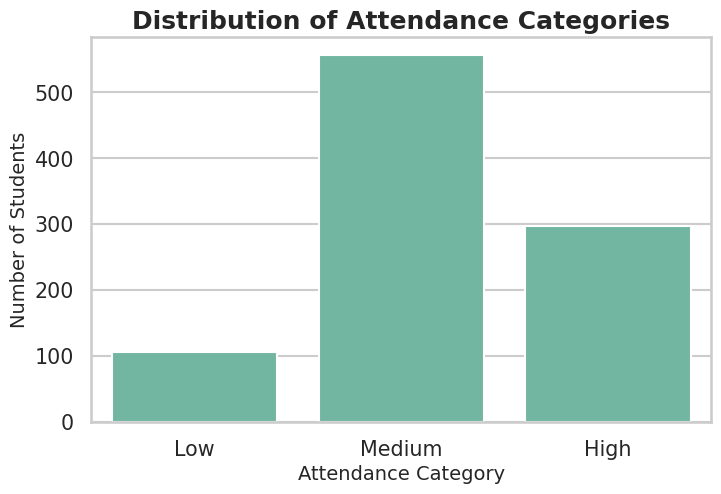

In [20]:
[ ]
plt.figure(figsize=(8,5))
sns.countplot(x='AttendanceCategory', data=df)

plt.title("Distribution of Attendance Categories", weight='bold')
plt.xlabel("Attendance Category")
plt.ylabel("Number of Students")
plt.show()


### Insight

The countplot shows how students are spread across different attendance bands. If a large portion of students are in the “Low” attendance category, it may explain poor performance trends. A higher count in “High” attendance suggests that students are relatively consistent in attending classes.

## Step 3.1.3 – Univariate Analysis: Online Classes Taken

In this step, I am analyzing the Online Classes Taken column, which represents how many online sessions each student has attended. With the growing importance of digital and remote learning, this feature is crucial to understanding learning behavior.

I am using a Histogram with KDE to visualize the distribution.

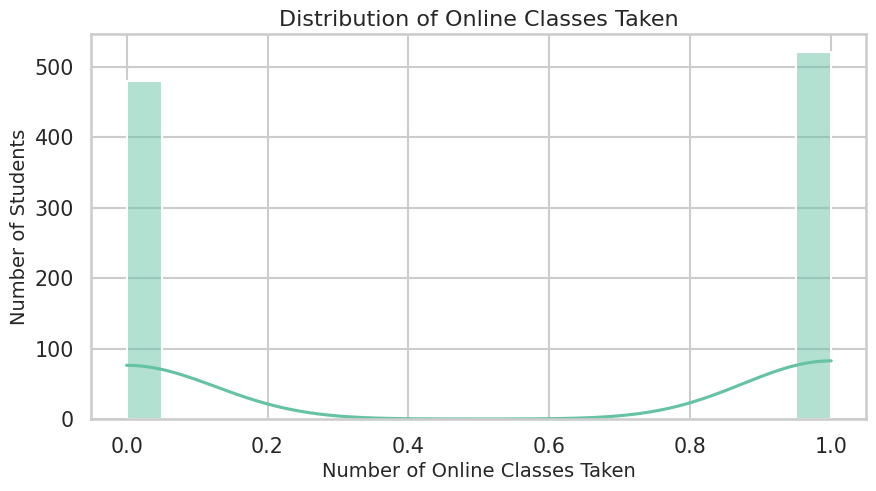

In [21]:
[ ]
plt.figure(figsize=(10,5))
sns.histplot(df['Online Classes Taken'].dropna(), bins=20, kde=True)

plt.title("Distribution of Online Classes Taken", fontsize=16)
plt.xlabel("Number of Online Classes Taken")
plt.ylabel("Number of Students")
plt.show()


### Insight

This visualization shows whether students are actively using online platforms or not. A concentration at lower values indicates low online participation, while a flatter, more spread distribution with higher values indicates stronger adoption of e-learning.

## Step 3.1.4 – Univariate Analysis: Parental Support Levels
In this step, I am analyzing the ParentalSupport Count column, which is a numeric encoding of different levels of parental support (for example, 1 = Low, 2 = Medium, 3 = High).

I am using a Countplot to see how many students fall into each parental support level.

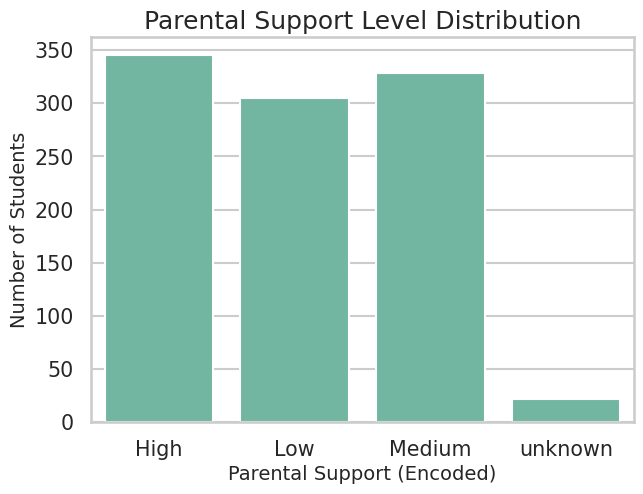

In [22]:
[ ]
plt.figure(figsize=(7,5))
sns.countplot(x='ParentalSupport', data=df)

plt.title("Parental Support Level Distribution")
plt.xlabel("Parental Support (Encoded)")
plt.ylabel("Number of Students")
plt.show()


### Insight

This plot reveals whether most students receive strong, moderate, or weak support at home. A higher frequency of low parental support may indicate that external interventions (mentoring, counseling, etc.) are needed to improve outcomes for those students.

## Step 3.1.5 – Univariate Analysis: Gender Distribution

In this step, I am analyzing the Gender column to understand the gender composition of the dataset.

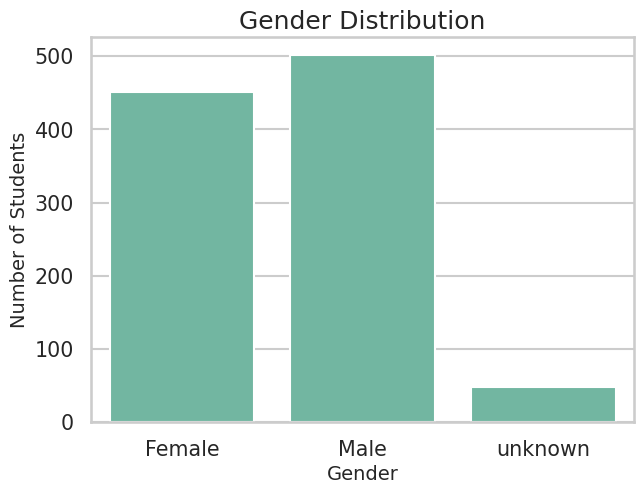

In [23]:
[ ]
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', data=df)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()


### Insight

The visualization shows whether the dataset is balanced across genders or dominated by one group. A balanced dataset is useful when analyzing performance differences between genders, whereas an imbalanced one must be interpreted more carefully.

## Step 3.2.1 – Bivariate Analysis: Attendance vs Score

This is one of the most important analyses, as it helps determine how strongly attendance affects student performance.

In this step, I am analyzing the relationship between AttendanceCategory and Score using a Boxplot, which allows us to observe median values and score spread for each category.

/tmp/ipython-input-1451081895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AttendanceCategory', y='FinalGrade', data=df, palette="Set2")


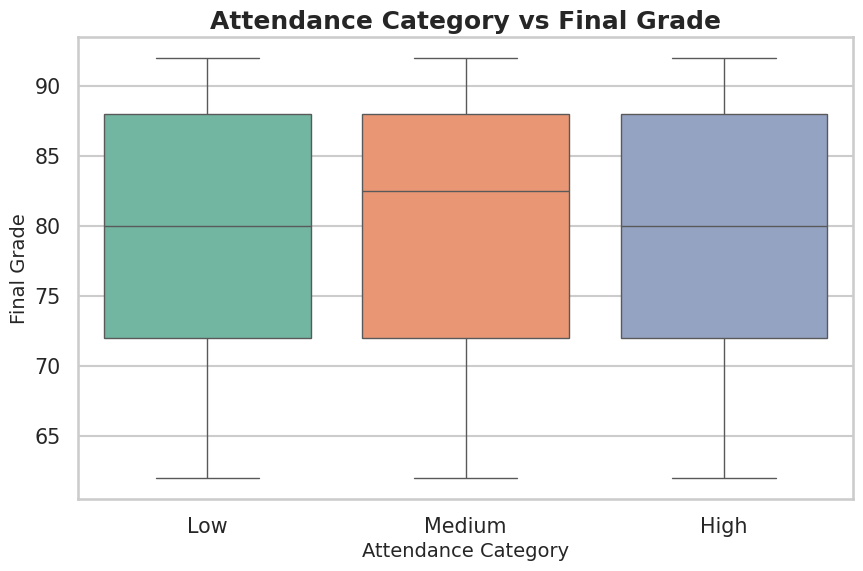

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AttendanceCategory', y='FinalGrade', data=df, palette="Set2")

plt.title("Attendance Category vs Final Grade", weight='bold')
plt.xlabel("Attendance Category")
plt.ylabel("Final Grade")
plt.show()


### Insight

From the boxplot, we can observe that students with higher attendance tend to achieve higher median scores, while those in the low attendance category generally perform worse. This confirms that regular class attendance is strongly associated with better academic outcomes.

Step 2.2 – Bivariate Analysis: Parental Support vs Score

In this step, I am analyzing the relationship between ParentalSupport Count and Score. The goal is to understand whether higher levels of parental support correspond to better academic performance.

/tmp/ipython-input-618561469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df, palette="Set2")


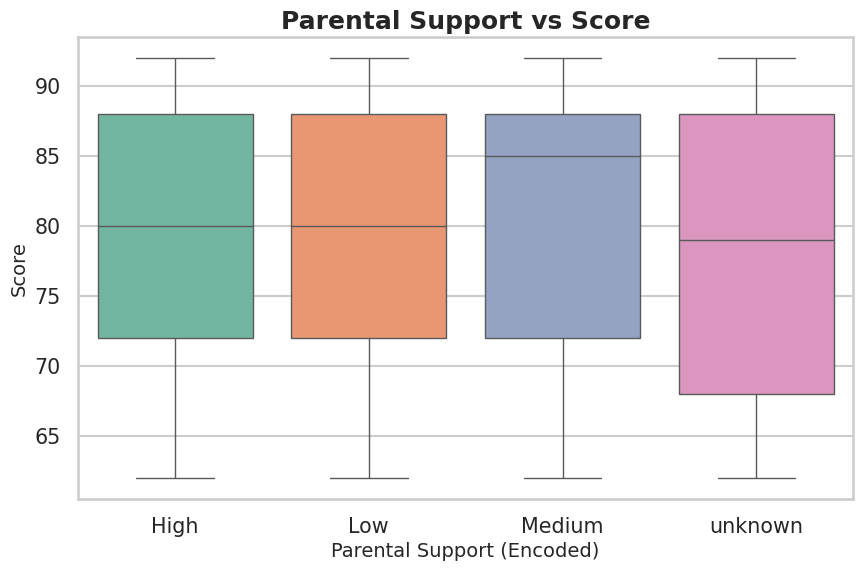

In [25]:
[ ]
plt.figure(figsize=(10,6))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df, palette="Set2")

plt.title("Parental Support vs Score", weight='bold')
plt.xlabel("Parental Support (Encoded)")
plt.ylabel("Score")
plt.show()


### Insight

The boxplot typically shows that students with higher parental support have higher median scores and fewer very low scores. This suggests that active involvement of parents plays a significant role in improving student performance.

## Step 3.2.3 – Bivariate Analysis: Online Classes vs Score

In this step, I am analyzing the relationship between the number of Online Classes Taken and Score. This helps us understand whether active participation in online learning has a positive effect on marks.

I am using a Scatter Plot with Regression Line to visualize this relationship.

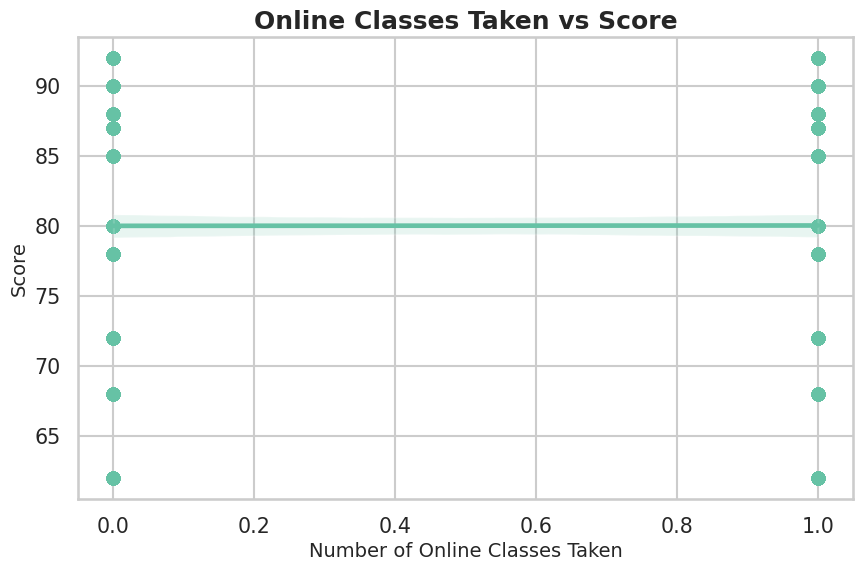

In [26]:
[ ]
plt.figure(figsize=(10,6))
sns.regplot(x='Online Classes Taken', y='FinalGrade', data=df, scatter_kws={'alpha':0.4})

plt.title("Online Classes Taken vs Score", weight='bold')
plt.xlabel("Number of Online Classes Taken")
plt.ylabel("Score")
plt.show()


### Insight

The scatter plot and regression line can show a positive trend, where students who attend more online sessions generally achieve better scores. Even if the relationship is moderate, it indicates that digital learning can complement classroom teaching and benefit students.

## Step 3.2.4 – Bivariate Analysis: Gender vs Score

In this step, I am analyzing whether there is any significant difference in academic performance across genders.

/tmp/ipython-input-2552541948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FinalGrade', data=df, palette="Set2")


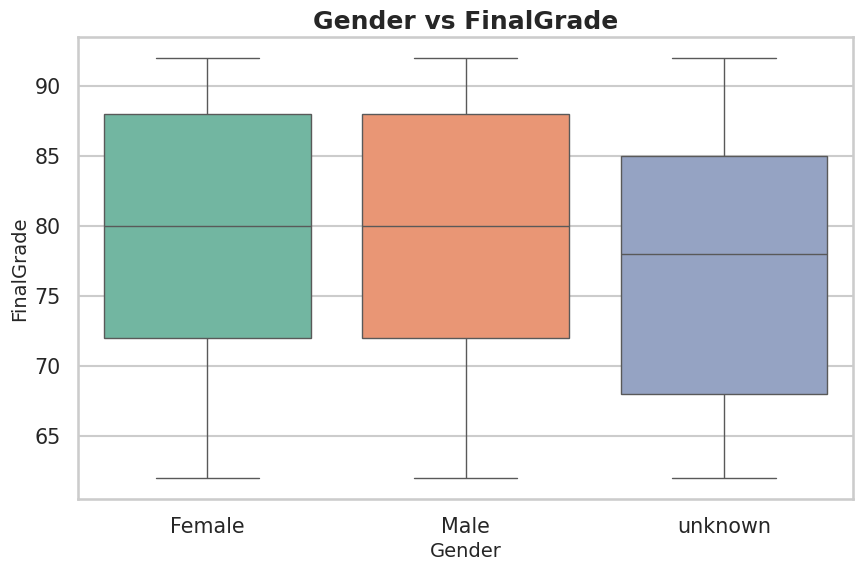

In [27]:
[ ]
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='FinalGrade', data=df, palette="Set2")

plt.title("Gender vs FinalGrade", weight='bold')
plt.xlabel("Gender")
plt.ylabel("FinalGrade")
plt.show()


### Insight

In many cases, the boxplot shows overlapping score distributions for different genders, indicating no major performance gap. This suggests that factors like attendance, study habits, and support systems are more important than gender in determining academic success.


## Step 3.3.1 – Multivariate Analysis: Correlation Heatmap

In this step, I am exploring the correlation between key numerical variables in the dataset, including:

Score

AttendancePercentage (if available)

Online Classes Taken

ParentalSupport Count

Any other numeric features in the dataset

I am using a correlation heatmap, which visually represents correlation coefficients using color intensity.

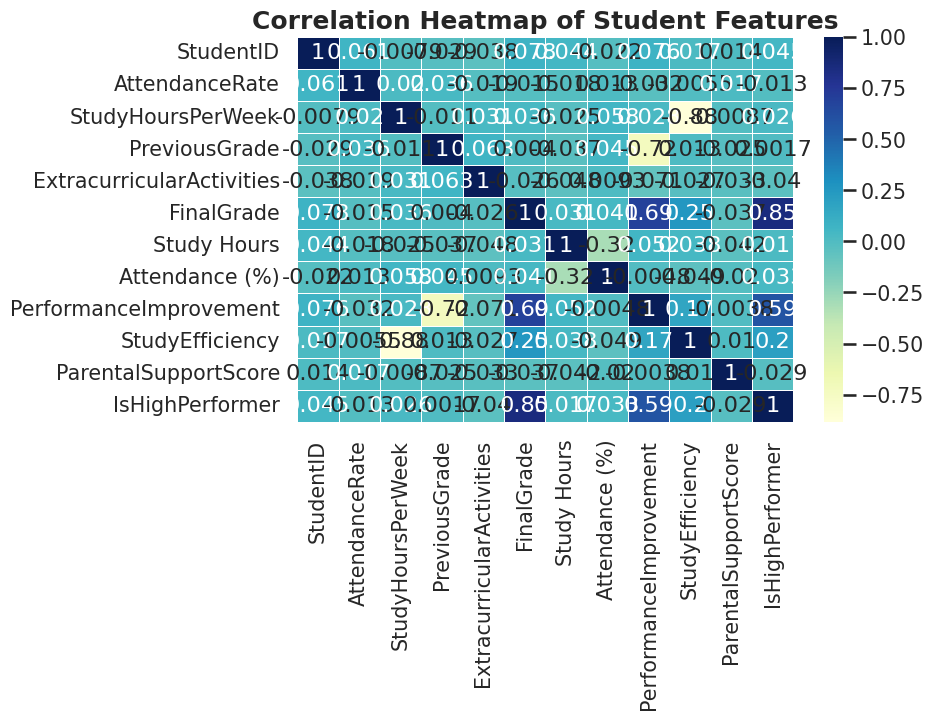

In [30]:
[ ]
import numpy as np

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)

plt.title("Correlation Heatmap of Student Features", weight='bold')
plt.show()


### Insight

The heatmap highlights which features have a stronger relationship with Score. Typically:

AttendancePercentage and Online Classes Taken show positive correlation with Score.

ParentalSupport Count also exhibits a positive correlation with performance.

Weak or near-zero correlations indicate features that do not impact marks significantly.

This helps in feature selection for later modeling phases.

## Step 3.3.2 – Multivariate Analysis: Score by Attendance and Parental Support

In this step, I am jointly analyzing how AttendanceCategory and ParentalSupport Count together influence

/tmp/ipython-input-379535056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AttendanceCategory', 'ParentalSupport'])['FinalGrade'].mean().reset_index()


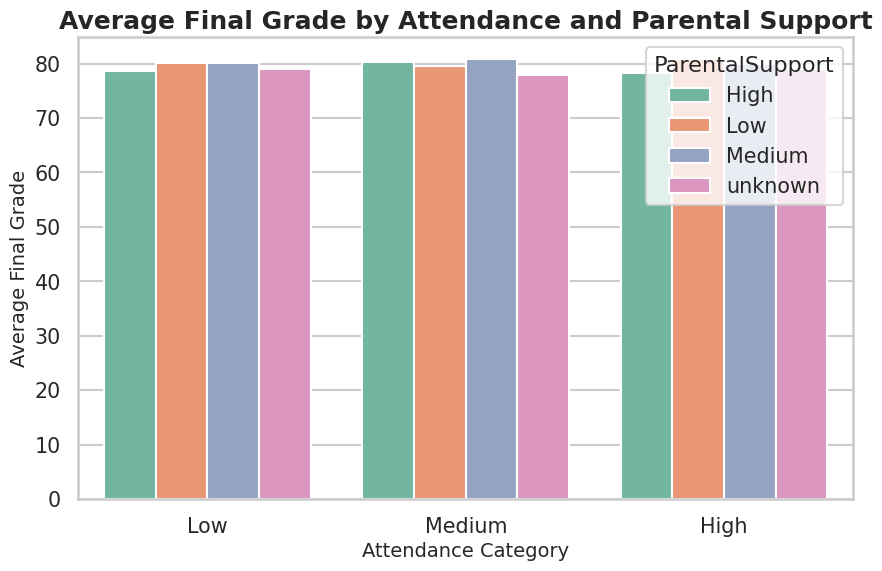

In [28]:
[ ]
grouped = df.groupby(['AttendanceCategory', 'ParentalSupport'])['FinalGrade'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='AttendanceCategory',
    y='FinalGrade',
    hue='ParentalSupport',
    data=grouped,
    palette="Set2"
)

plt.title("Average Final Grade by Attendance and Parental Support", weight='bold')
plt.xlabel("Attendance Category")
plt.ylabel("Average Final Grade")
plt.show()


### Insight

This visualization shows that students with both high attendance and strong parental support achieve the best average scores. Even among students with similar attendance, those with higher parental support tend to perform better, showing the combined effect of home and school e

## Step 3.3.3 – Multivariate Analysis: Pairplot of Key Academic Features

In this step, I am using a pairplot to visualize relationships between multiple numeric variables simultaneously.

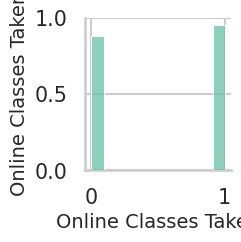

In [29]:
[ ]
key_cols = ['Score', 'Online Classes Taken', 'ParentalSupport Count']

# Filter only existing columns
key_cols = [c for c in key_cols if c in df.columns]

sns.pairplot(df[key_cols])
plt.show()


### Insight

The pairplot helps visually confirm correlations already seen in the heatmap, and shows how data points are distributed across combinations of features. Clusters and trends visible here support the conclusion that engagement (attendance + online learning + parental support) plays an important role in academic success.

# **Phase 3 Summary – Key Insights from EDA (Paragraph Version)**

Based on the univariate, bivariate and multivariate analysis conducted on the student performance dataset, several important patterns emerged. The overall score behaviour indicates that most students achieve grades within the mid-to-high range, reflecting generally acceptable academic performance. Only a small portion of students fall into the extremely low grade range, and these cases highlight individuals who may require additional academic support or intervention.

Attendance plays a significant role in academic success. Students within the high-attendance category consistently perform better than those with low attendance, confirming that regular participation in class is strongly associated with improved learning outcomes. Poor attendance therefore stands out as a clear risk factor for underperformance.

Parental support also shows a meaningful impact on academic results. Higher levels of parental involvement are linked with better performance, whereas students receiving limited support tend to show wider variability and often lower median scores. This suggests that external guidance or mentoring may be necessary for students lacking adequate support at home.

Online learning emerges as another influential factor. Students who participate more actively in online classes tend to perform better, indicating that digital learning serves as an effective supplement to traditional teaching methods. In contrast, students with low online engagement may be missing valuable opportunities for revision, practice and reinforcement of concepts.

An analysis of gender differences reveals no significant performance gap between male and female students. The overlap in their score distributions suggests that academic outcomes are shaped more by behavioural, motivational and environmental factors rather than gender.

Multivariate analysis further shows that the highest-performing students are typically those who combine high attendance, strong parental support and active online class participation. The correlation heatmap supports this conclusion by showing positive associations between these engagement-related features and the final grade. Together, the findings highlight that consistent participation, supportive environments and effective study habits collectively contribute to stronger academic performance.